In [1]:
#importing necessary files
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#Market info
r= 0.06

#Share specific info
S0 = 100
sigma = 0.3

#Put option specific info
K = 110
T = 1
k_log = np.log(K)

In [2]:
#Code for analytical solution for vanilla European put option
d_1_stock = (np.log(S0/K)+(r + sigma**2/2)*T)/(sigma*np.sqrt(T))
d_2_stock = d_1_stock - sigma*np.sqrt(T)

analytic_callprice = S0*norm.cdf(d_1_stock) - K*np.exp(-r*T)*norm.cdf(d_2_stock)

In [3]:
#Characteristic functions
def c_M1(t):
    return np.exp(1j*t*(np.log(S0)+(r-sigma**2/2)*T) - (sigma**2)*T*(t**2)/2)

def c_M2(t):
    return np.exp(1j*t*sigma**2*T)*c_M1(t)

In [4]:
#Choosing t_max and N
t_max = 20
N = 100

#Calculating delta and constructing t_n
delta_t = t_max/N
from_1_to_N = np.linspace(1,N,N)
t_n = (from_1_to_N-1/2)*delta_t

#Approximate integral estimates
first_integral = sum((((np.exp(-1j*t_n*k_log)*c_M2(t_n)).imag)/t_n)*delta_t)
second_integral = sum((((np.exp(-1j*t_n*k_log)*c_M1(t_n)).imag)/t_n)*delta_t)

In [5]:
#fourier call value
fourier_call_val = S0*(1/2+first_integral/np.pi) - np.exp(-r*T)*K*(1/2+second_integral/np.pi) 

#fourier put value
fourier_put_val = np.exp(-r*T)*K*(1/2+(-second_integral)/np.pi) - S0*(1/2+(-first_integral)/np.pi)
fourier_put_val_pcparity = fourier_call_val - S0 + np.exp(-r*T)*K 

In [6]:
print("Call prices -- analytic and fourier")
print(analytic_callprice)
print(fourier_call_val)

Call prices -- analytic and fourier
10.424100458714285
10.424100443080057


In [7]:
#Fourier-Cosine series expansion

#General functions for valuation
def upsilon_n(b2,b1,d,c,n):
    npi_d = np.pi*n*(d-b1)/(b2-b1)
    npi_c = np.pi*n*(c-b1)/(b2-b1)
    val_one = (np.cos(npi_d)*np.exp(d)-np.cos(npi_c)*np.exp(c))
    val_two = (n*np.pi*(np.sin(npi_d)*np.exp(d)-np.sin(npi_c)*np.exp(c))/(b2-b1))
    return (val_one + val_two)/(1+(n*np.pi/(b2-b1))**2)

def psi_n(b2,b1,d,c,n):
    if n == 0:
        return d-c
    else:
        return (b2-b1)*(np.sin(n*np.pi*(d-b1)/(b2-b1))-np.sin(n*np.pi*(c-b1)/(b2-b1)))/(n*np.pi)              

In [8]:
#Functions for call valuation
def v_n(K,b2,b1,n):
    return 2*K*(upsilon_n(b2,b1,b2,0,n) - psi_n(b2,b1,b2,0,n))/(b2-b1)

def logchar_func(u,S0,r,sigma,K,T):
    return np.exp(1j*u*(np.log(S0/K) + (r-sigma**2/2)*T) - (sigma**2)*T*(u**2)/2)

def call_price(N,S0,sigma,r,K,T,b2,b1):
    price = v_n(K,b2,b1,0)*logchar_func(0,S0,r,sigma,K,T)/2
    for n in range(1,N):
        price = price + logchar_func(n*np.pi/(b2-b1),S0,r,sigma,K,T)*np.exp(-1j*n*np.pi
                                                                            *b1/(b2-b1))*v_n(K,b2,b1,n)
    return price.real*np.exp(-r*T)

In [9]:
#b1, b2 for call
c1 = r
c2 = T*sigma**2
c4 = 0
L = 10

b1 = c1-L*np.sqrt(c2-np.sqrt(c4))
b2 = c1+L*np.sqrt(c2-np.sqrt(c4))

In [10]:
#Calculating COS for varios N
COS_callprice = [None]*50

for i in range(1,51):
    COS_callprice[i-1] = call_price(i,S0,sigma,r,K,T,b2,b1)

Text(0, 0.5, 'Call price')

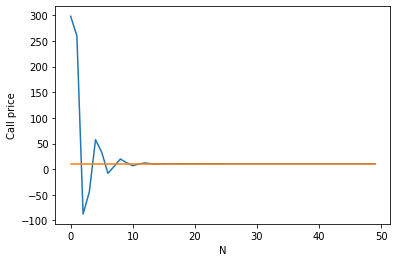

In [11]:
#Plotting the results
plt.plot(COS_callprice)
plt.plot([analytic_callprice]*50)
plt.xlabel("N")
plt.ylabel("Call price")

In [12]:
v_n(K, b2, b1, 50)

1.141350998861934

In [13]:
upsilon_n(b2, b1, b2, 0, 50)

-0.007069431827638465